In [1]:
%%capture
!pip install pandas seaborn requests

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import requests

In [3]:
# Get tables from url
path = "./data/aminoacids_properties.html"
url = "https://www.sigmaaldrich.com/life-science/metabolomics/learning-center/amino-acid-reference-chart.html"
if not os.path.isfile(path):
    with open(path, "w") as file:
        file.write(requests.get(url).text)
tables = pd.read_html(path, header=0)
# Get first table and remove last comment line
aminoacids = tables[0].copy()[:-1]
# Fix table header
aminoacids.columns = [c.replace(' ', '') for c in aminoacids.columns]
aminoacids = aminoacids.rename(mapper={"ResidueWeight(-H2O)": "ResidueWeight", "Abbr..1": "Sym"}, axis=1)
aminoacids.set_index("Abbr.", inplace=True)
aminoacids

,Name,Sym,MolecularWeight,MolecularFormula,ResidueFormula,ResidueWeight,pKa1,pKb2,pKx3,pl4
Abbr.,,,,,,,,,,
Ala,Alanine,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,–,6.00
Arg,Arginine,R,174.20,C6H14N4O2,C6H12N4O,156.19,2.17,9.04,12.48,10.76
Asn,Asparagine,N,132.12,C4H8N2O3,C4H6N2O2,114.11,2.02,8.80,–,5.41
Asp,Aspartic acid,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77
Cys,Cysteine,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07
Glu,Glutamic acid,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22
Gln,Glutamine,Q,146.15,C5H10N2O3,C5H8N2O2,128.13,2.17,9.13,–,5.65
Gly,Glycine,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,–,5.97
His,Histidine,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59


In [4]:
# Get table of hydrophobicity at given pH
hyd = tables[1].copy()
# Drop comments
hyd.drop([0, 7, 11, 18, 25], inplace=True)
# Split table for attribute
hyd2, hyd7 = hyd.iloc[:, :2], hyd.iloc[:, 2:]
hyd2.columns = ["Abbr.", "HydpH2"]
hyd7.columns = ["Abbr.", "HydpH7"]
hyd2.set_index("Abbr.", inplace=True)
hyd7.set_index("Abbr.", inplace=True)
# Concat by index
hyd = pd.concat([hyd2, hyd7], axis=1)
hyd

,HydpH2,HydpH7
Abbr.,,
Leu,100,97
Ile,100,99
Phe,92,100
Trp,84,97
Val,79,76
Met,74,74
Cys,52,49
Tyr,49,63
Ala,47,41


In [5]:
# Remove NaN
hyd = hyd[:-1].copy()
# Fix value
hyd.loc["Pro", "HydpH7"] = -46

In [6]:
aminoacids = pd.concat([aminoacids, hyd], axis=1)

In [7]:
# Fix columns types
numerics = ["MolecularWeight", "ResidueWeight", "pKa1", "pKb2", "pKx3", "pl4", "HydpH2", "HydpH7"]
# Apply column-wise casting and map missing to zero
aminoacids[numerics] = aminoacids[numerics].applymap(lambda x: pd.to_numeric(x, errors="coerce")).fillna(0)
aminoacids

,Name,Sym,MolecularWeight,MolecularFormula,ResidueFormula,ResidueWeight,pKa1,pKb2,pKx3,pl4,HydpH2,HydpH7
Abbr.,,,,,,,,,,,,
Ala,Alanine,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,0.00,6.00,47.0,41.0
Arg,Arginine,R,174.20,C6H14N4O2,C6H12N4O,156.19,2.17,9.04,12.48,10.76,-26.0,-14.0
Asn,Asparagine,N,132.12,C4H8N2O3,C4H6N2O2,114.11,2.02,8.80,0.00,5.41,-41.0,-28.0
Asp,Aspartic acid,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,2.77,-18.0,-55.0
Cys,Cysteine,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,5.07,52.0,49.0
Glu,Glutamic acid,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,3.22,8.0,-31.0
Gln,Glutamine,Q,146.15,C5H10N2O3,C5H8N2O2,128.13,2.17,9.13,0.00,5.65,-18.0,-10.0
Gly,Glycine,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,0.00,5.97,0.0,0.0
His,Histidine,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,7.59,-42.0,8.0


In [8]:
aminoacids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Ala to Val
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              22 non-null     object 
 1   Sym               22 non-null     object 
 2   MolecularWeight   22 non-null     float64
 3   MolecularFormula  22 non-null     object 
 4   ResidueFormula    22 non-null     object 
 5   ResidueWeight     22 non-null     float64
 6   pKa1              22 non-null     float64
 7   pKb2              22 non-null     float64
 8   pKx3              22 non-null     float64
 9   pl4               22 non-null     float64
 10  HydpH2            22 non-null     float64
 11  HydpH7            22 non-null     float64
dtypes: float64(8), object(4)
memory usage: 2.2+ KB


In [9]:
aminoacids.describe()

,MolecularWeight,ResidueWeight,pKa1,pKb2,pKx3,pl4,HydpH2,HydpH7
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,136.740909,118.726364,2.061818,9.004091,2.507273,5.735000,21.045455,22.954545
std,29.387263,29.389193,0.516616,2.055394,4.163517,2.116252,50.399808,50.849430
min,75.070000,57.050000,0.000000,0.000000,0.000000,0.000000,-46.000000,-55.000000
25%,119.630000,101.620000,1.967500,9.115000,0.000000,5.510000,-18.000000,-13.000000
50%,132.615000,114.600000,2.175000,9.300000,0.000000,5.710000,4.000000,4.000000
75%,148.690000,130.680000,2.310000,9.615000,4.100000,5.995000,68.500000,71.250000
max,204.230000,186.220000,2.830000,10.600000,12.480000,10.760000,100.000000,100.000000


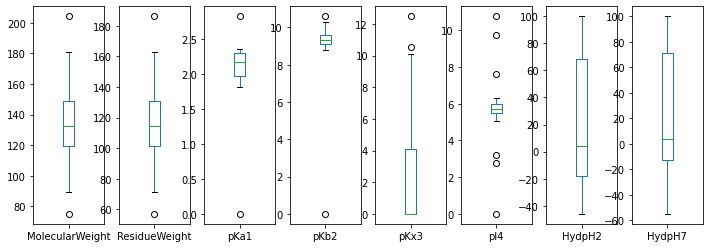

In [10]:
_ = aminoacids.plot.box(subplots=True, figsize=(12, 4))

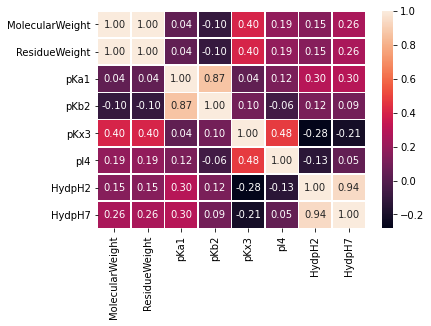

In [11]:
_ = sns.heatmap(aminoacids[numerics].corr(), linewidths=.5, annot=True, fmt=".2f")

In [12]:
aminoacids.to_csv("./data/aminoacids_properties.csv")